# Spatially Assign Work¶
In this example, assignments will be assigned to specific workers based on the city district that it falls in. A layer in ArcGIS Online representing the city districts in Palm Springs will be used.

* Note: This example requires having Arcpy or Shapely installed in the Python environment.

### Import ArcGIS API for Python
Import the `arcgis` library and some modules within it.

In [1]:
from datetime import datetime
from arcgis.gis import GIS
from arcgis.geometry import Geometry
from arcgis.mapping import WebMap
from arcgis.apps import workforce
from datetime import datetime

### Connect to organization and Get the Project
Let's connect to ArcGIS Online and get the Project with assignments.

In [2]:
gis = GIS("https://arcgis.com", "workforce_scripts")
item = gis.content.get("29f2f056e5e04ba383e59737b3f8b340")
project = workforce.Project(item)

Enter password: ········


### Get Layer of City Districts
Let's get the layer representing city districts and display it.


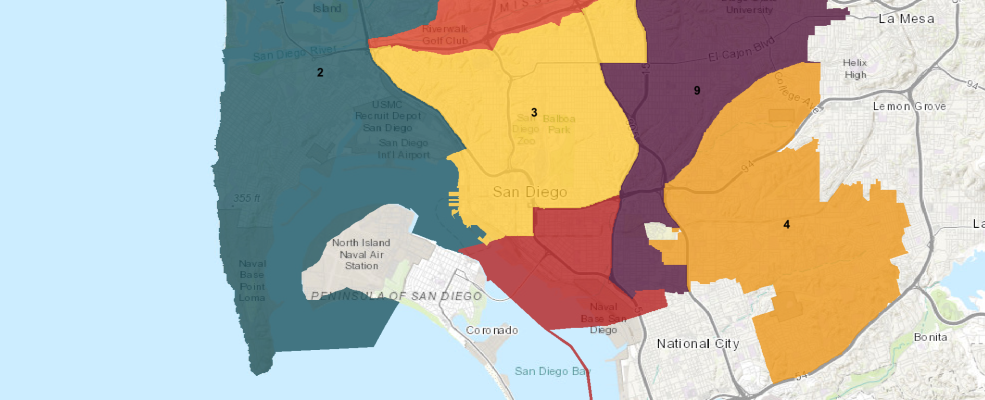

In [3]:
districts_layer = gis.content.get("08eecb2f46c740aaba316cef8a719a88").layers[0]
districts_map = gis.map("San Diego, CA", zoomlevel=12)
districts_map.add_layer(districts_layer)
districts_map

### Add Assignments to the Map

In [4]:
districts_map.add_layer(project.assignments_layer)

### Create a spatially enabled dataframe of the districts

In [5]:
districts_df = districts_layer.query(as_df=True)

### Get all of the unassigned assignments

In [6]:
assignments = project.assignments.search("status=0")

### Assign Assignments Based on Which District They Intersect¶
Let's fetch the districts layer and query to get all of the districts. Then, for each unassigned assignment intersect the assignment with all districts to determine which district it falls in. Assignments in district 3 should be assigned to James. Assignments in district 8 should be assigned to Aaron. Finally update all of the assignments using "batch_update".

In [7]:
aaron = project.workers.get(user_id="aaron_nitro")
james = project.workers.get(user_id="james_Nitro")
for assignment in assignments:
    contains = districts_df["SHAPE"].geom.contains(Geometry(assignment.geometry))
    containers = districts_df[contains]
    if not containers.empty: 
        district = containers['district'].iloc[0]
        if district == 3:
            assignment.worker = james
            assignment.status = "assigned"
            assignment.assigned_date = datetime.utcnow()
        elif district == 8:
            assignment.worker = aaron
            assignment.status = "assigned"
            assignment.assigned_date = datetime.utcnow()
assignments = project.assignments.batch_update(assignments)


### Verify Assignments are Assigned


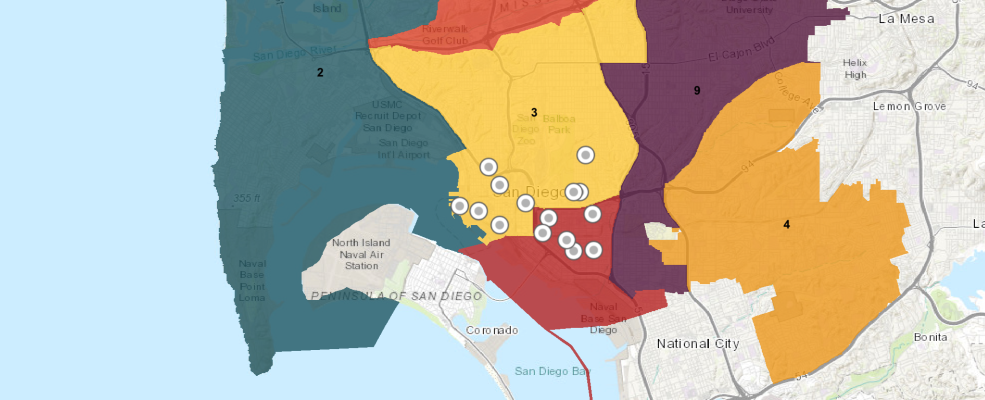

In [8]:
districts_map